In [1]:
def PathTree(G, i : int = 0):
    T = Graph()
    n = G.order()        
    visited = [0] * n
    
    def recursive_path(v : int, parent : int = -1):
        visited[v] = 1
        curr_vtx = T.order()
        T.add_vertex()
        
        if curr_vtx != 0:
            T.add_edge(curr_vtx, parent)
        
        for u in G.neighbor_iterator(v):
            if visited[u] == 0:
                recursive_path(u, curr_vtx)
                
        visited[v] = 0
    
    recursive_path(i)
    return T

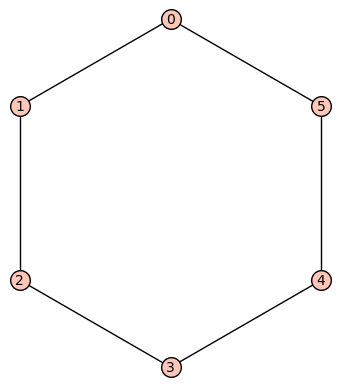

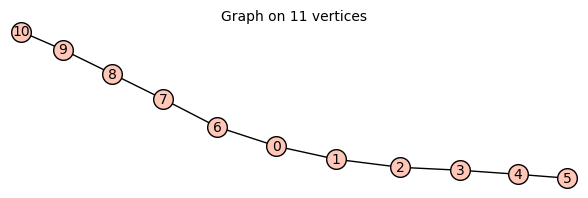

In [2]:
G = graphs.CycleGraph(6)
G.plot().show()
PathTree(G, 0)

In [4]:
min_size = 1
max_size = 6

list_of_graphs = []

for size in range(min_size, max_size + 1):
    print("\nTesting with size: ", size)
    cnt = 0
    
    for G in graphs(size):
        if not G.is_connected() or G.is_tree():
            continue
        
        founded = []
        for i in range(G.order()):
            T = PathTree(G, i)
            
            if T.has_perfect_matching():
                if not G.has_perfect_matching():
                    print("GRAPH WHITOUT PERFECT MATCHING")

                
                already_found = False
                for T2 in founded:
                    if T.is_isomorphic(Graph(T2)):
                        already_found = True
                if already_found:
                    continue
                        
                # print(f"FOUND: vertex {i}")
                # G.plot().show()
                # T.plot().show()
                
                t = T.graph6_string()
                founded.append(T)
                list_of_graphs.append((G.graph6_string(), i, t))



Testing with size:  1

Testing with size:  2

Testing with size:  3

Testing with size:  4

Testing with size:  5

Testing with size:  6


In [5]:
list_of_graphs

[('CV', 1, 'EhOG'),
 ('ECRo', 1, 'GpC`?C'),
 ('ECRw', 2, 'IhOI?D??G'),
 ('ECr_', 0, 'IpCK?C@?_'),
 ('ECpo', 2, 'IhCI?C@?G'),
 ('ECqg', 0, 'IpGK?CA?G'),
 ('ECro', 2, 'MhGI?C@?I??@?@??_'),
 ('ECrg', 2, 'MhGI?C@?I??@?@?A?'),
 ('ECrw', 2, 'QhGI?C@?I??@?@??g???@??C??_'),
 ('ECZO', 1, 'GkCG_C'),
 ('ECZG', 2, 'IhCI?C@?_'),
 ('ECZW', 2, 'MhCG_D??G?_C?G??_'),
 ('EQjO', 0, 'IkE?GCC?G')]

In [62]:
for G, i, T in list_of_graphs:
    grid = graphics_array([[Graph(G).plot(), Graph(T).plot()]])
    file_path = f"./data/Pathtrees_with_perfect_matching/{G}.png"
    grid.save(file_path)

In [3]:
def inverse_of_tree(T):
    A = T.adjacency_matrix()
    G = Graph(A.inverse()) 
    return G

In [75]:
for G, i, T in list_of_graphs:
    G2 = inverse_of_tree(Graph(T))
    grid = graphics_array([[Graph(G).plot(), Graph(T).plot(), G2.plot()]])
    file_path = f"./data/Inverse_pathtree/{G}.png"
    grid.save(file_path, figsize=(10, 6))

## Theorem: If $T(G)$ is invertible, then $G$ has a unique perfect matching

In [29]:
min_size = 2
max_size = 8
step = 2

list_of_graphs = []

for size in range(min_size, max_size + 1, step):
    print("\nTesting with size: ", size)
    cnt = 0
    
    for G in graphs(size):
        if not G.is_connected() or G.is_tree():
            continue
    
        cnt += 1
        if cnt % 1000 == 0:
            print(cnt, "of", 11094)
    
        matchings = 0
        for m in G.perfect_matchings():
            matchings += 1
            if matchings == 2:
                break
        
        if matchings != 1:
            continue        
        
        founded = []
        for i in range(G.order()):
            T = PathTree(G, i)
            
            if T.has_perfect_matching():
                already_found = False
                for T2 in founded:
                    if T.is_isomorphic(Graph(T2)):
                        already_found = True
                if already_found:
                    continue
                        
                # print(f"FOUND: vertex {i}")
                # G.plot().show()
                # T.plot().show()
                
                t = T.graph6_string()
                founded.append(T)
                list_of_graphs.append((G.graph6_string(), i, t))


Testing with size:  2

Testing with size:  4

Testing with size:  6

Testing with size:  8
1000 of 11094
2000 of 11094
3000 of 11094
4000 of 11094
5000 of 11094
6000 of 11094
7000 of 11094
8000 of 11094
9000 of 11094
10000 of 11094
11000 of 11094


### A graph can have two non-isomorphic pathtrees that are invertible? - YES

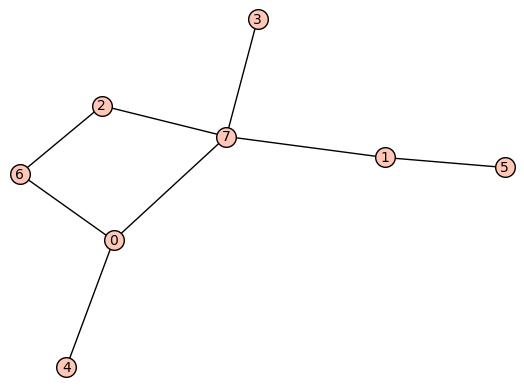

Vertex:  0


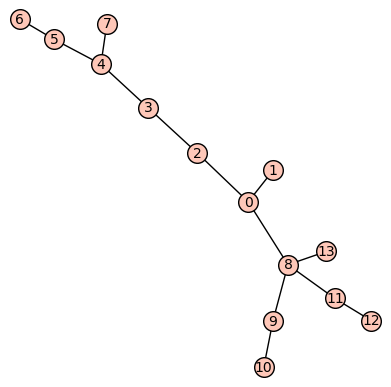

Vertex:  1


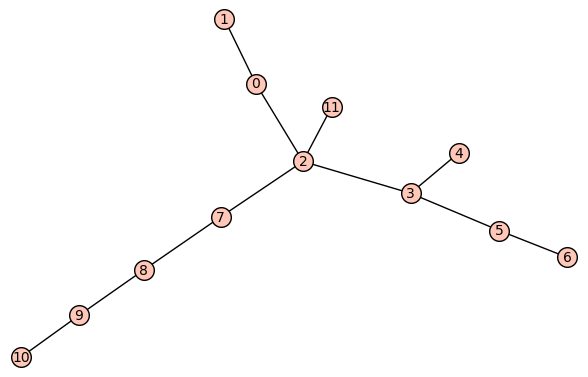

In [27]:
total_len = list_of_graphs
st = {}
for g, i, t in list_of_graphs:
    if g in st:
        G = Graph(g)
        G.plot().show()
        print("Vertex: ", st[g])
        PathTree(G, st[g]).plot().show()
        print("Vertex: ", i)
        PathTree(G, i).plot().show()
        break
        
    st[g] = i

## Every graph with a unique parfect matching have an invertible pathtree? - NO

In [31]:
min_size = 2
max_size = 8
step = 2

unique_pm_graphs = []

for size in range(min_size, max_size + 1, step):
    print("\nTesting with size: ", size)
    cnt = 0
    
    for G in graphs(size):
        if not G.is_connected() or G.is_tree():
            continue
    
        cnt += 1
        if cnt % 1000 == 0:
            print(cnt, "of", 11094)
    
        matchings = 0
        for m in G.perfect_matchings():
            matchings += 1
            if matchings == 2:
                break
        
        if matchings == 1:
            unique_pm_graphs.append(G.graph6_string())


Testing with size:  2

Testing with size:  4

Testing with size:  6

Testing with size:  8
1000 of 11094
2000 of 11094
3000 of 11094
4000 of 11094
5000 of 11094
6000 of 11094
7000 of 11094
8000 of 11094
9000 of 11094
10000 of 11094
11000 of 11094


In [33]:
if len(unique_pm_graphs) == len(list_of_graphs):
    print("YES")
else:
    print("NO")

NO


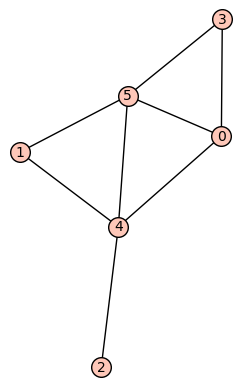

In [37]:
g_in_list = [g for g, i, t in list_of_graphs]

example = Graph()

for g in unique_pm_graphs:
    if g not in g_in_list:
        example = Graph(g)
        example.plot().show()
        break

In [48]:
for i in range(example.order()):
    T = PathTree(example, i)
    print(f"Vertex: {i}, size of tree: {T.order()}, matching: {T.matching(value_only=True)}")

Vertex: 0, size of tree: 25, matching: 10
Vertex: 1, size of tree: 26, matching: 12
Vertex: 2, size of tree: 21, matching: 10
Vertex: 3, size of tree: 28, matching: 11
Vertex: 4, size of tree: 21, matching: 10
Vertex: 5, size of tree: 21, matching: 9


## The graphs with invertible integral trees are inverses of some tree? - Not necessarily

In [55]:
g, i, t = list_of_graphs[0]
G = Graph(g)
A = G.adjacency_matrix()
A_inv = A.inverse()
print(A_inv)


[ 0 -1  1  0]
[-1  2 -1  1]
[ 1 -1  0  0]
[ 0  1  0  0]


## Graphs with unique perfect matching that does not have invertible integral trees

In [60]:
g_in_list = [g for g, i, t in list_of_graphs]

for g in unique_pm_graphs:
    if g in g_in_list:
        continue
    G = Graph(g)
    if G.order() <= 6:
        file_path = f"./data/Unique_perfect_matching/{g}.png"
        G.plot().save(file_path)